# Task 2.2 

Applying the specified methods, implement algorithms for the numerical solution of a differential equation
$$
    y' = 0.2y + \frac{0.8}{x}
$$
with an initial condition $y(1) = 2$ on an interval $[1,10]$.

Provide software implementations of the following methods: **Euler**, **Runge-Kutta**, and **Adams**.

In [ ]:
# Cell 1: RHS and problem parameters
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# RHS: dy/dx = f(x, Y_euler)
def f(x, y):
    return 0.2 * y + 0.8 / x

# initial condition and X_euler
y0 = 2.0
start = 1.0
end = 10.0

### Euler's Method

Consider the initial value problem
$$
    y' = f(x, y), \quad y(x_0)=y_0 .
$$

The linear approximation of $y(t_{n+1})$ using the Euler formula is
$$
    y(x_{n+1}) = y(x_{n})+ h * f(x, y) 
$$
where $h = x_{n+1}-x_{n}$.

Therefore, to find the values of the function $y$ at all $x_n$, given $y_0$ and $f(x,y)$, we can start with finding $y(x_1)$ using the Euler’s formula and repeat the process through a for loop for $y(x_2)$, $y(x_3)$, ... 


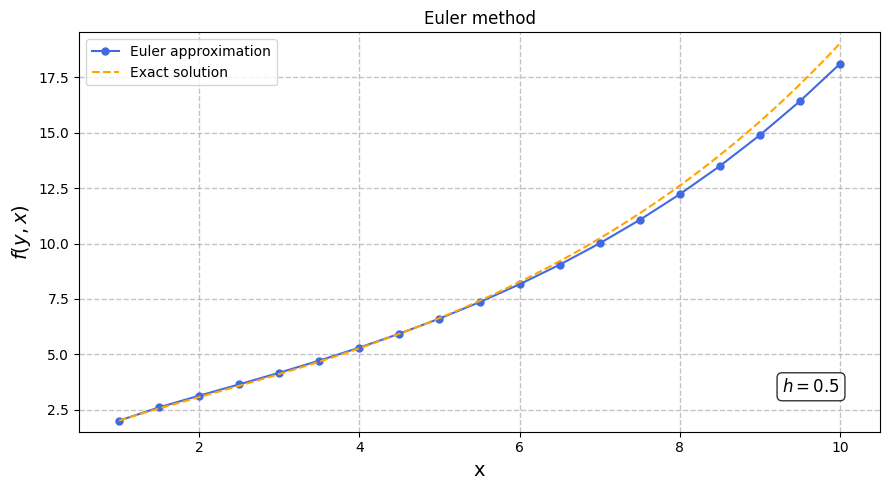

In [ ]:
# --- Euler ---
h = 0.5 # step size

X_euler = np.arange(start, end + 1e-12, h)
Y_euler = np.zeros(len(X_euler))
Y_euler[0] = y0
for i in range(len(X_euler) - 1):
    yi = Y_euler[i]
    xi = X_euler[i]
    Y_euler[i + 1] = yi + h * f(xi, yi)

# --- Exact (for the reference) ---
X_exact = np.linspace(start, end, 400)
Y_exact = odeint(lambda y,x: f(x,y), y0, X_exact)

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))

ymin = min(Y_euler.min(), Y_exact.min()) - 0.5
ymax = max(Y_euler.max(), Y_exact.max()) + 0.5
ax.set_ylim(ymin, ymax)
ax.set_xlim(start - 0.5, end + 0.5)


ax.set_xlabel("x", fontsize=14)
ax.set_ylabel(r"$f(y, x)$", fontsize=14)

# Grid
ax.grid(True, which="major", linestyle="--", linewidth=1.0, alpha=.75)

# Curves
ax.plot(
    X_euler, Y_euler,
    color="royalblue",
    marker='o',
    markersize=5,
    label="Euler approximation"
)

ax.plot(
    X_exact, Y_exact,
    color="orange",
    linestyle="--",
    label="Exact solution"
)

h_str = rf"$h = {h:g}$"
ax.text(
    0.95, 0.09, h_str,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3")
)

plt.title("Euler method")
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

### Runge-Kutta's Method
